In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)


In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
# DF1 = Total and facet scores, and score per question
df1 = pd.read_csv('India_riskliteracy_dataset_above median_2024.csv')
df1

,#,Unnamed: 1,#.1,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",_Distribution 1_\n\nHow risky do you perceive the investment to be?,_Distribution 2_\n\nHow risky do you perceive the investment to be?,_Distribution 3_\n\nHow risky do you perceive the investment to be?,_Distribution 4_\n\nHow risky do you perceive the investment to be?,_Distribution 5_\n\nHow risky do you perceive the investment to be?,Distribution 6\n\nHow risky do you perceive the investment to be?,Distribution 7\n\nHow risky do you perceive the investment to be?,Distribution 8\n\nHow risky do you perceive the investment to be?,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?",The

In [4]:
df1.reset_index(drop = False, inplace = True)
df1.rename({"index":"responseid","graph1":"graphliteracy1", "graph2":"graphliteracy2", "graph3":"graphliteracy3",
            "riskcalculation1":"riskcomprehension1", "riskcalculation2":"riskcomprehension2",
            "riskcalculation3":"riskcomprehension3", "riskcalculation4":"riskcomprehension4"}, axis = 1, inplace = True)
df1

,responseid,#,Unnamed: 1,#.1,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",_Distribution 1_\n\nHow risky do you perceive the investment to be?,_Distribution 2_\n\nHow risky do you perceive the investment to be?,_Distribution 3_\n\nHow risky do you perceive the investment to be?,_Distribution 4_\n\nHow risky do you perceive the investment to be?,_Distribution 5_\n\nHow risky do you perceive the investment to be?,Distribution 6\n\nHow risky do you perceive the investment to be?,Distribution 7\n\nHow risky do you perceive the investment to be?,Distribution 8\n\nHow risky do you perceive the investment to be?,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken tog

In [5]:
income_options = "Please indicate your approximate annual personal income from all sources for last year"
df1["gender"] = df1["Please indicate your Gender."]
df1["occupation"] = df1["Please state your current occupation."]


df1["age"] = df1["Please mark your age (in years)"]
df1["age_rec"] = 0
df1["age_rec"] = np.where(df1["Please mark your age (in years)"] == "18 - 25", 2,
                          np.where(df1["Please mark your age (in years)"] == "25 - 35", 2,
                                   np.where(df1["Please mark your age (in years)"] == "36 - 45", 3,
                                            np.where(df1["Please mark your age (in years)"] == "46 - 55", 3,
                                                     np.where(df1["Please mark your age (in years)"] == "56 - 65", 4,
                                                              np.where(df1["Please mark your age (in years)"] == "Above 65", 4, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                         )

# !!!!!!! IMPORTANT NOTE FOR FUTURE !!!!!!!!
# age_rec there is a difference between the Indian dataset and Eurpoean dataset
# In Indian  : 36 - 55 --> age_rec = 3; 56 and above --> age_rec = 4
# In European: 36 - 59 --> age_rec = 3; 60 and above --> age_rec = 4
# The Indian dataset does not have raw age data, only predefined age groups; and I didnt want to change the European dataset 
# and the predetermined age_rec variable present there

df1["education"] = df1["What is currently your highest Education?"]
df1["isced"] = np.where(df1["education"] == "Ph.D. or higher", 1,
                          np.where(df1["education"] == "Post Graduate", 2,
                                   np.where(df1["education"] == "Under Graduate", 3,
                                            np.where(df1["education"] == "Diploma or vocation training", 3,
                                                     np.where(df1["education"] == "School degree (X or XII)", 4, 0
                                                             )
                                                    )
                                           )
                                  )
                         )

df1["responseid"] = df1["responseid"] + 1


df1["income"] = np.where(df1[income_options] == "&lt; 5,00,000", 1,
                          np.where(df1[income_options] == "5,00,000 - 15,00,000", 2,
                                   np.where(df1[income_options] == "15,00,001 - 25,00,000", 3,
                                            np.where(df1[income_options] == "25,00,001 - 35,00,000", 4,
                                                     np.where(df1[income_options] == "35,00,001 - 45,00,000", 5,
                                                              np.where(df1[income_options] == "&gt; 45,00,000", 6, 7
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                         )

df1["wealth"] = df1["Please provide a rough guess (in Indian Rupees) of the worth of your household's assets. Please do not forget to correct it for your debts, such as a mortgage or any loans you might have."]

df1 = df1.drop(["Certainty score_5", "Uncertainty score_5", "Number Comprehension score_5", "Graph Comprehension score_5", "Calculation score_4",
         "Total Score_19"], axis = 1)

df1["Certainty_3"] = df1["certainty1"] + df1["certainty2"] + df1["certainty3"]
df1["RiskComprehension_4"] = df1["riskcomprehension1"] + df1["riskcomprehension2"] + df1["riskcomprehension3"] + df1["riskcomprehension4"]
df1["GraphLiteracy_3"] = df1["graphliteracy1"] + df1["graphliteracy2"] + df1["graphliteracy3"]
df1["Numeracy_3"] = df1["numeracy1"] + df1["numeracy2"] + df1["numeracy3"]
df1["Bayesianreasoning_1"] = df1["numeracy4"]
df1["TotalScore_14"] = df1["Certainty_3"] + df1["RiskComprehension_4"] + df1["GraphLiteracy_3"] + df1["Numeracy_3"] + df1["Bayesianreasoning_1"]

df1["Certainty_%"] = df1["Certainty_3"] / 3 * 100
df1["RiskComprehension_%"] = df1["RiskComprehension_4"] / 4 * 100
df1["GraphLiteracy_%"] = df1["GraphLiteracy_3"] / 3 * 100
df1["Numeracy_%"] = df1["Numeracy_3"] / 3 * 100
df1["Bayesianreasoning_%"] = df1["Bayesianreasoning_1"] / 1 * 100

df1["TotalScore_%"] = df1["TotalScore_14"] / 14 * 100


colReq = ["responseid", "age", "gender", "education", "occupation", "age_rec", "isced", "income", "wealth", "Certainty_3", "RiskComprehension_4",
          "GraphLiteracy_3", "Numeracy_3", "Bayesianreasoning_1", "TotalScore_14", "Certainty_%", "RiskComprehension_%", "GraphLiteracy_%",
          "Numeracy_%", "Bayesianreasoning_%", "TotalScore_%",]

df2 = df1[colReq].copy()
df2

,responseid,age,gender,education,occupation,age_rec,isced,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%
0,1,25 - 35,Male,Under Graduate,"Investment Professional, i.e. stock broker/tra...",2,3,2,50000,0,0,1,1,0,2,0.000000,0.0,33.333333,33.333333,0.0,14.285714
1,2,25 - 35,Female,Under Graduate,Employee/Consultant in Other than the Finance ...,2,3,1,1500000,0,1,1,2,0,4,0.000000,25.0,33.333333,66.666667,0.0,28.571429
2,3,18 - 25,Female,Under Graduate,Student,2,3,2,500000,1,0,0,0,1,2,33.333333,0.0,0.000000,0.000000,100.0,14.285714
3,4,46 - 55,Female,Under Graduate,Entrepreneur or Own Business,3,3,1,15000000,0,1,1,2,0,4,0.000000,25.0,33.333333,66.666667,0.0,28.571429
4,5,46 - 55,Female,Post Graduate,Employee/Consultant in Other than the Finance ...,3,2,2,3000000,0,0,1,3,0,4,0.000000,0.0,33.333333,100.000000,0.0,28.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,639,25 - 35,Male,Post Graduate,"Investment Professional, i.e. stock broker/tra...",2,2,1,50000,2,1,0,3,1,7,66.666667,25.0,0.000000,100.000000,100.0,50.000000
639,640,36 - 45,Male,Ph.D. or higher,Employee/Consultant in Other than the Finance ...,3,1,3,8500000,1,2,2,3,1,9,33.333333,50.0,66.666667,100.000000,100.0,64.285714
640,641,36 - 45,Female,Post Graduate,Entrepreneur or Own Business,3,2,2,2000000,0,3,2,1,0,6,0.000000,75.0,66.666667,33.333333,0.0,42.857143
641,642,18 - 25,Male,Under Graduate,Entrepreneur or Own Business,2,3,2,60000000,1,1,1,1,0,4,33.333333,25.0,33.333333,33.333333,0.0,28.571429


In [6]:
df1

,responseid,#,Unnamed: 1,#.1,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",_Distribution 1_\n\nHow risky do you perceive the investment to be?,_Distribution 2_\n\nHow risky do you perceive the investment to be?,_Distribution 3_\n\nHow risky do you perceive the investment to be?,_Distribution 4_\n\nHow risky do you perceive the investment to be?,_Distribution 5_\n\nHow risky do you perceive the investment to be?,Distribution 6\n\nHow risky do you perceive the investment to be?,Distribution 7\n\nHow risky do you perceive the investment to be?,Distribution 8\n\nHow risky do you perceive the investment to be?,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken tog

In [7]:
df1.to_csv("India_riskliteracy_dataset_above median_2024 v190924.csv")

In [8]:
# DF3 = Sorted by income, income = 7 removed
# riskQuartile introduced

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)
df3.insert(loc = len(df3.columns), column = "riskQuartile", value = pd.qcut(df3["TotalScore_14"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df3

,responseid,age,gender,education,occupation,age_rec,isced,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%,riskQuartile
0,322,18 - 25,Female,Under Graduate,Entrepreneur or Own Business,2,3,1,500000,0,0,1,3,0,4,0.000000,0.0,33.333333,100.000000,0.0,28.571429,2
1,124,36 - 45,Male,Post Graduate,Entrepreneur or Own Business,3,2,1,25000,0,2,2,3,0,7,0.000000,50.0,66.666667,100.000000,0.0,50.000000,3
2,125,18 - 25,Male,Under Graduate,Employee/Consultant in Other than the Finance ...,2,3,1,400000,1,3,1,2,1,8,33.333333,75.0,33.333333,66.666667,100.0,57.142857,4
3,494,25 - 35,Female,Under Graduate,"Investment Professional, i.e. stock broker/tra...",2,3,1,10000,0,2,0,2,1,5,0.000000,50.0,0.000000,66.666667,100.0,35.714286,2
4,470,25 - 35,Male,Post Graduate,Employee/Consultant in Other than the Finance ...,2,2,1,600000,0,0,2,1,0,3,0.000000,0.0,66.666667,33.333333,0.0,21.428571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,293,46 - 55,Male,Post Graduate,Employee/Consultant in Other than the Finance ...,3,2,6,10000000,1,2,1,2,0,6,33.333333,50.0,33.333333,66.666667,0.0,42.857143,3
639,337,46 - 55,Male,Post Graduate,Employee/Consultant in Other than the Finance ...,3,2,6,25000000,0,1,1,1,0,3,0.000000,25.0,33.333333,33.333333,0.0,21.428571,1
640,336,25 - 35,Male,Ph.D. or higher,"Investment Professional, i.e. stock broker/tra...",2,1,6,100000000,0,1,3,1,0,5,0.000000,25.0,100.000000,33.333333,0.0,35.714286,2
641,264,46 - 55,Female,Post Graduate,Employee/Consultant in Other than the Finance ...,3,2,6,500000,2,0,2,0,0,4,66.666667,0.0,66.666667,0.000000,0.0,28.571429,2


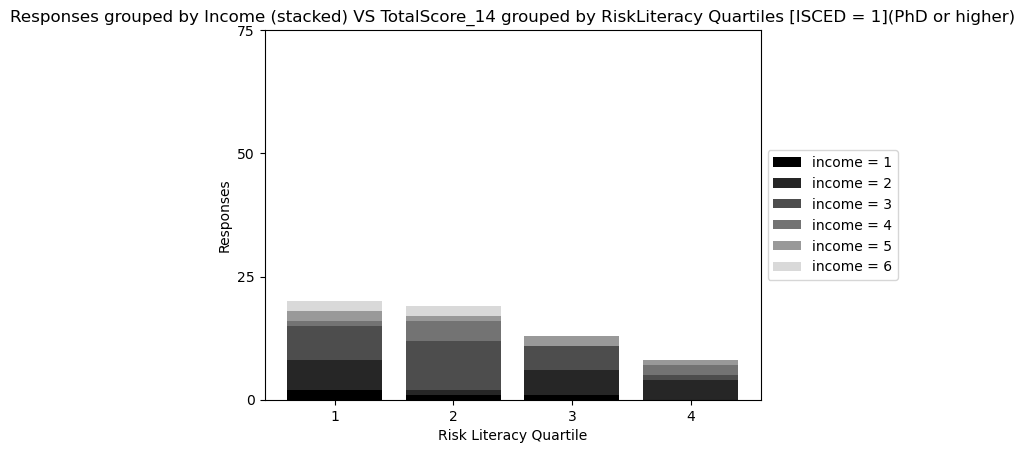

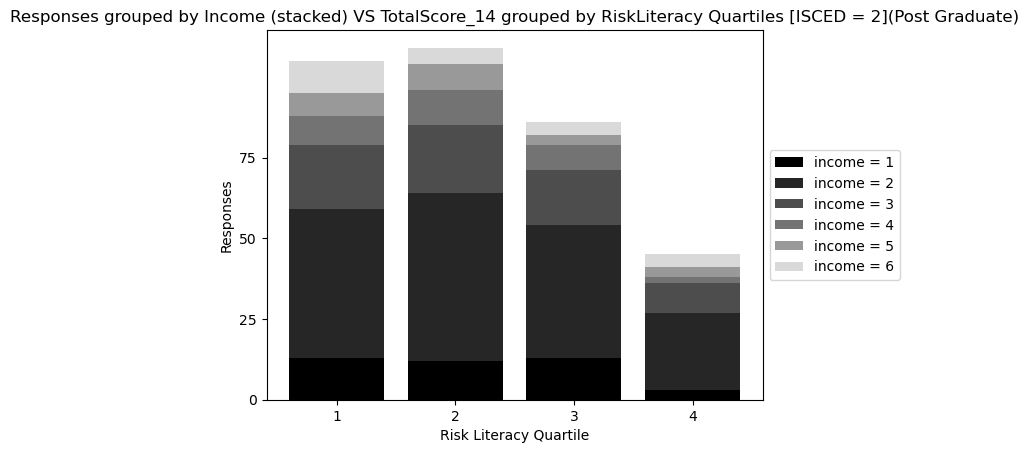

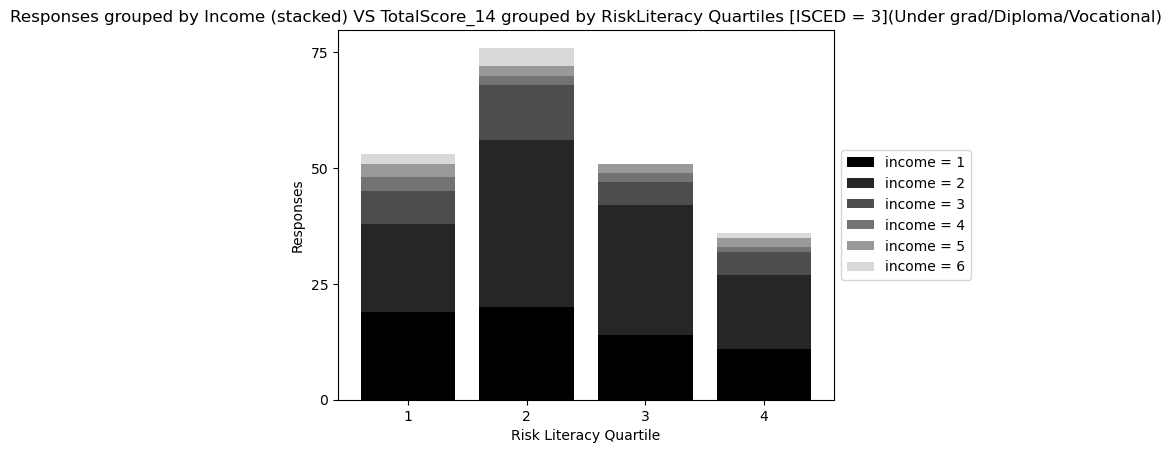

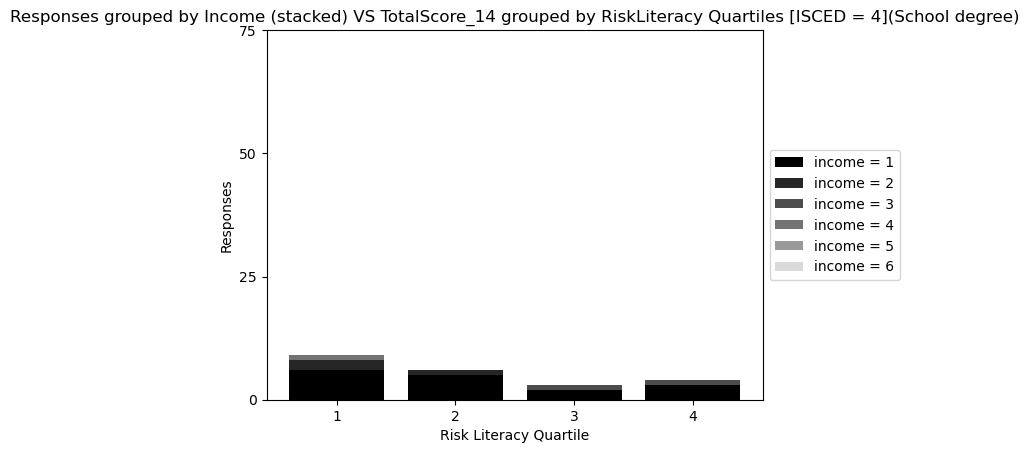

In [9]:
x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 1](PhD or higher)")
plt.show()

x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 2](Post Graduate)")
plt.show()

x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 3](Under grad/Diploma/Vocational)")
plt.show()

x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 4](School degree)")
plt.show()

In [10]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "wealthQuartile", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')
df4.insert(loc = len(df4.columns), column = "riskQuartile", value = pd.qcut(df4["TotalScore_14"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

,responseid,age,gender,education,occupation,age_rec,isced,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%,wealthQuartile,riskQuartile
0,53,36 - 45,Male,Ph.D. or higher,"Investment Professional, i.e. stock broker/tra...",3,1,3,0,1,0,0,2,0,3,33.333333,0.0,0.000000,66.666667,0.0,21.428571,1,1
1,254,25 - 35,Male,Diploma or vocation training,Employee/Consultant in Other than the Finance ...,2,3,1,0,0,1,1,1,0,3,0.000000,25.0,33.333333,33.333333,0.0,21.428571,1,1
2,613,25 - 35,Male,School degree (X or XII),"Investment Professional, i.e. stock broker/tra...",2,4,1,0,3,1,0,2,0,6,100.000000,25.0,0.000000,66.666667,0.0,42.857143,1,3
3,454,18 - 25,Male,Ph.D. or higher,Employee/Consultant in Other than the Finance ...,2,1,2,2,1,1,3,3,0,8,33.333333,25.0,100.000000,100.000000,0.0,57.142857,1,4
4,114,25 - 35,Female,Post Graduate,"Investment Professional, i.e. stock broker/tra...",2,2,1,2,2,1,0,1,0,4,66.666667,25.0,0.000000,33.333333,0.0,28.571429,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,61,18 - 25,Female,Under Graduate,Employee/Consultant in Other than the Finance ...,2,3,4,500000000,1,1,0,1,0,3,33.333333,25.0,0.000000,33.333333,0.0,21.428571,4,1
639,589,46 - 55,Male,Post Graduate,Employee/Consultant in Other than the Finance ...,3,2,3,500000000,1,2,3,3,0,9,33.333333,50.0,100.000000,100.000000,0.0,64.285714,4,4
640,425,25 - 35,Female,Under Graduate,Student,2,3,6,500000000,1,2,3,3,0,9,33.333333,50.0,100.000000,100.000000,0.0,64.285714,4,4
641,89,36 - 45,Female,Post Graduate,"Investment Professional, i.e. stock broker/tra...",3,2,3,500000000,0,0,0,2,1,3,0.000000,0.0,0.000000,66.666667,100.0,21.428571,4,1


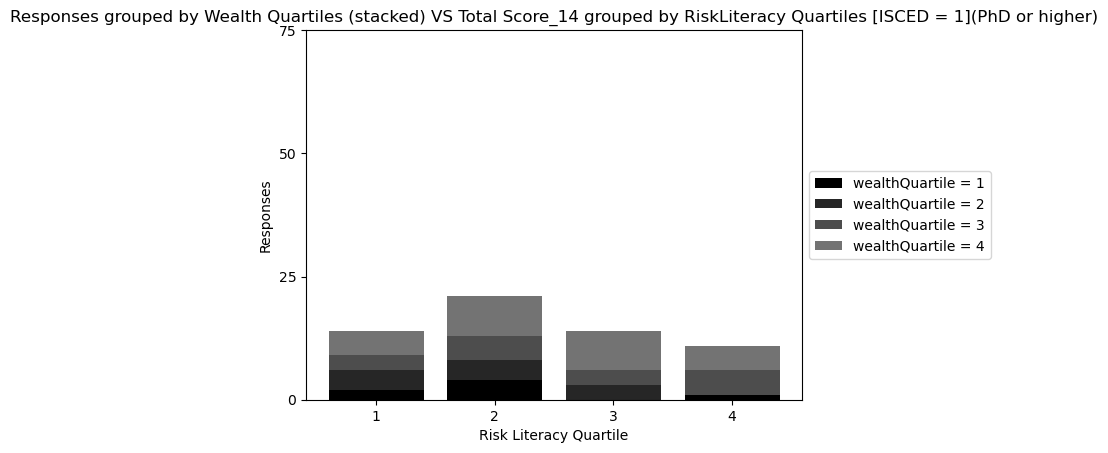

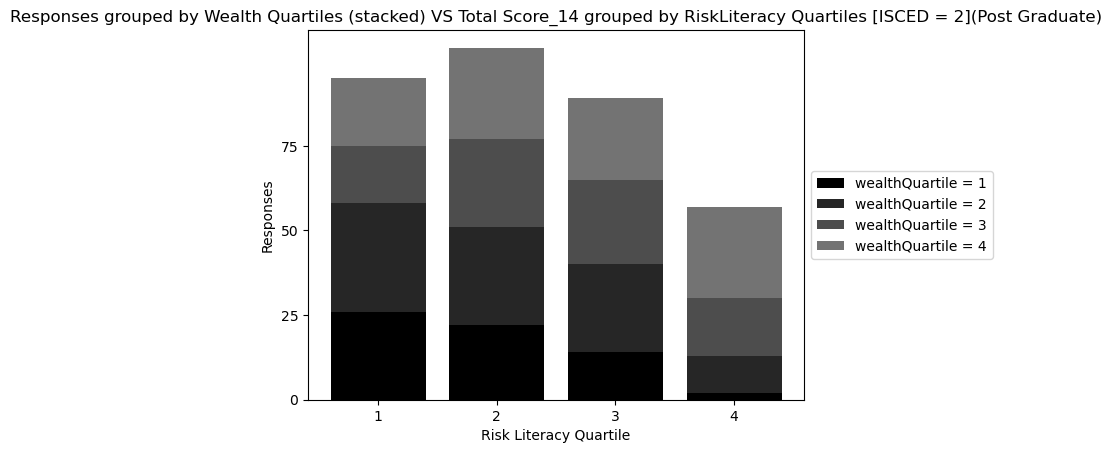

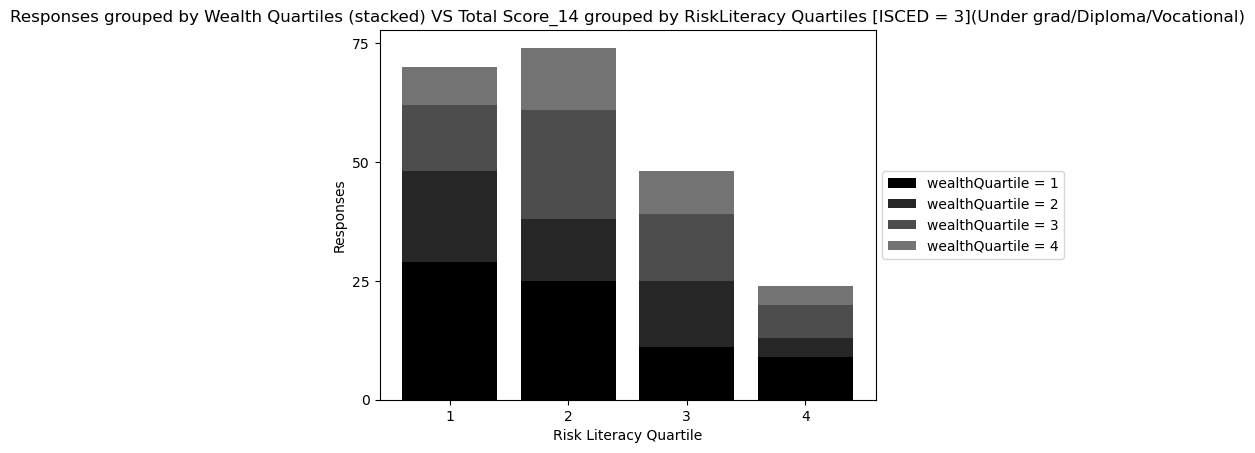

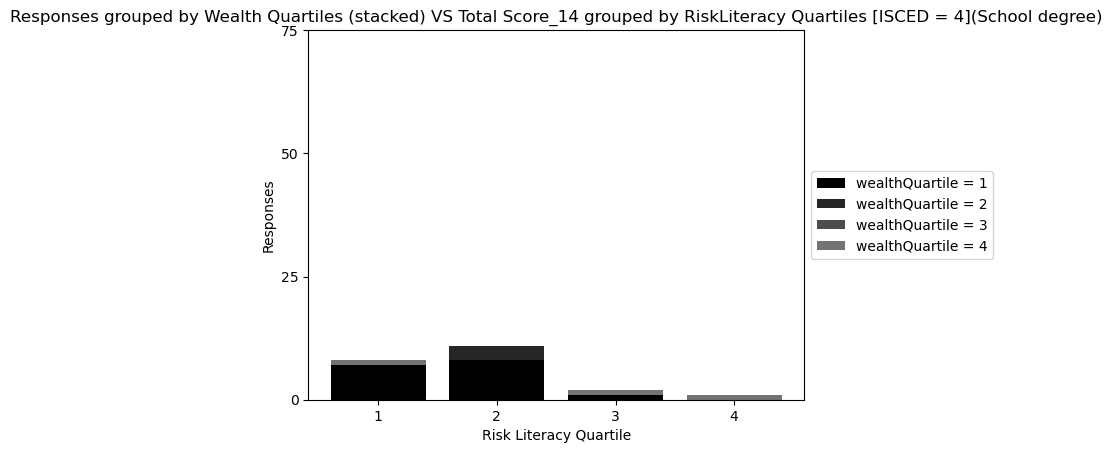

In [11]:
x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 1](PhD or higher)")
plt.show()

x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 2](Post Graduate)")
plt.show()

x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 3](Under grad/Diploma/Vocational)")
plt.show()

x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 4), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 100, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 4](School degree)")
plt.show()

In [12]:
df2.columns

Index(['responseid', 'age', 'gender', 'education', 'occupation', 'age_rec',
       'isced', 'income', 'wealth', 'Certainty_3', 'RiskComprehension_4',
       'GraphLiteracy_3', 'Numeracy_3', 'Bayesianreasoning_1', 'TotalScore_14',
       'Certainty_%', 'RiskComprehension_%', 'GraphLiteracy_%', 'Numeracy_%',
       'Bayesianreasoning_%', 'TotalScore_%'],
      dtype='object')

In [13]:
age = df2.age.value_counts().to_frame()
age["%"] = age["count"] / df2.age.value_counts().sum() * 100
age

,count,%
age,,
25 - 35,301,46.811820
36 - 45,171,26.594090
18 - 25,92,14.307932
46 - 55,54,8.398134
56 - 65,19,2.954899
Above 65,6,0.933126


In [14]:
gender = df2.gender.value_counts().to_frame()
gender["%"] = gender["count"] / df2.gender.value_counts().sum() * 100
gender

,count,%
gender,,
Male,354,55.054432
Female,289,44.945568


In [15]:
education = df2.education.value_counts().to_frame()
education["%"] = education["count"] / df2.education.value_counts().sum() * 100
education

,count,%
education,,
Post Graduate,345,53.654743
Under Graduate,186,28.926905
Ph.D. or higher,60,9.331260
Diploma or vocation training,30,4.665630
School degree (X or XII),22,3.421462


In [16]:
occupation = df2.occupation.value_counts().to_frame()
occupation["%"] = occupation["count"] / df2.occupation.value_counts().sum() * 100
occupation

,count,%
occupation,,
Employee/Consultant in Other than the Finance Sector,378,58.786936
"Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.",154,23.950233
Entrepreneur or Own Business,96,14.930016
Student,7,1.088647
Home Maker or not employed,5,0.777605
Retired person,3,0.466563


In [18]:
isced = df2.isced.value_counts().to_frame()
isced["%"] = isced["count"] / df2.isced.value_counts().sum() * 100
isced.sort_index()

,count,%
isced,,
1,60,9.331260
2,345,53.654743
3,216,33.592535
4,22,3.421462


In [25]:
income = df2.income.value_counts().to_frame()
income["%"] = income["count"] / df2.income.value_counts().sum() * 100
income.sort_index()

,count,%
income,,
1,125,19.440124
2,281,43.701400
3,121,18.818040
4,46,7.153966
5,36,5.598756
6,34,5.287714


In [29]:
incomeOptions = df1[income_options].value_counts().to_frame()
incomeOptions["%"] = incomeOptions["count"] / df1[income_options].value_counts().sum() * 100
incomeOptions.sort_index()

,count,%
Please indicate your approximate annual personal income from all sources for last year,,
"&gt; 45,00,000",34,5.287714
"&lt; 5,00,000",125,19.440124
"15,00,001 - 25,00,000",121,18.818040
"25,00,001 - 35,00,000",46,7.153966
"35,00,001 - 45,00,000",36,5.598756
"5,00,000 - 15,00,000",281,43.701400


In [33]:
wealth = df2.wealth.value_counts().to_frame()
wealth["%"] = wealth["count"] / df2.wealth.value_counts().sum() * 100
wealth = wealth.sort_index()
wealth

,count,%
wealth,,
0,3,0.466563
2,2,0.311042
3,1,0.155521
5,1,0.155521
10,2,0.311042
...,...,...
100000000,8,1.244168
300000000,2,0.311042
400000000,1,0.155521


In [35]:
with pd.ExcelWriter("Demographics_descriptives_indianSurvey.xlsx") as writer:
    age.to_excel(writer, sheet_name = "age")
    gender.to_excel(writer, sheet_name = "gender")
    education.to_excel(writer, sheet_name = "education")
    occupation.to_excel(writer, sheet_name = "occupation")
    isced.to_excel(writer, sheet_name = "isced")
    income.to_excel(writer, sheet_name = "income")
    incomeOptions.to_excel(writer, sheet_name = "incomeOptions")
    wealth.to_excel(writer, sheet_name = "wealth")